# Capstone Project
This is the final project for the Udacity Data Science Nanodegree.
Datasource: https://www.kaggle.com/koryto/countryinfo#covid19countryinfo.csv

During the analysis, timeseries of cases are analyzed, Tha data has been taken from the CSSE at Johns Hopkins University:
https://github.com/CSSEGISandData/COVID-19/edit/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [1]:
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython import display
%matplotlib inline

df_countryinfo = pd.read_csv('./covid19countryinfo.csv') # Read in data
df_tests = pd.read_csv('./covid19tests.csv') # Read in data
df_timeseries = pd.read_csv('./time_series_covid19_confirmed_global.csv') # Read in data

In [2]:
df_countryinfo.head()

,region,country,alpha3code,alpha2code,pop,tests,testpop,density,medianage,urbanpop,...,newcases30,newcases31,deaths,newdeaths30,newdeaths31,recovered,critical30,critical31,casediv1m,deathdiv1m
0,NaN,Afghanistan,AFG,AF,"38,928,346",NaN,NaN,60.0,18.0,25.0,...,25,4,4,NaN,NaN,5,NaN,NaN,4,0.1
1,NaN,Albania,ALB,AL,"2,877,797",NaN,NaN,105.0,36.0,63.0,...,11,20,15,1.0,4.0,52,7,8,84,5.0
2,NaN,Algeria,DZA,DZ,"43,851,044",NaN,NaN,18.0,29.0,73.0,...,NaN,132,44,NaN,9.0,46,NaN,NaN,16,1.0
3,NaN,Andorra,AND,AD,"77,265",NaN,NaN,164.0,45.0,88.0,...,NaN,NaN,8,NaN,NaN,10,10,10,"4,789",104.0
4,NaN,Antigua and Barbuda,ATG,AG,"97,929",NaN,NaN,223.0,34.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN


In [3]:
df_countryinfo.columns

Index(['region', 'country', 'alpha3code', 'alpha2code', 'pop', 'tests',
       'testpop', 'density', 'medianage', 'urbanpop', 'quarantine', 'schools',
       'publicplace', 'gatheringlimit', 'gathering', 'nonessential',
       'hospibed', 'smokers', 'sex0', 'sex14', 'sex25', 'sex54', 'sex64',
       'sex65plus', 'sexratio', 'lung', 'femalelung', 'malelung', 'gdp2019',
       'healthexp', 'healthperpop', 'fertility', 'firstcase', 'totalcases',
       'active30', 'active31', 'newcases30', 'newcases31', 'deaths',
       'newdeaths30', 'newdeaths31', 'recovered', 'critical30', 'critical31',
       'casediv1m', 'deathdiv1m'],
      dtype='object')

In [4]:
df_tests.head()

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m
0,NaN,Argentina,ARG,AR,"2,847",589,27-Mar,63,207.0
1,NaN,Armenia,ARM,AM,"1,580",265,25-Mar,535,168.0
2,NaN,Australia,AUS,AU,"245,623","4,559",31-Mar,"9,670",19.0
3,NaN,Austria,AUT,AT,"52,344","9,974",31-Mar,"5,880",191.0
4,NaN,Azerbaijan,AZE,AZ,"30,000",273,30-Mar,"3,031",9.0


In [5]:
df_tests.columns

Index(['region', 'country', 'alpha3code', 'alpha2code', 'tests', 'positive',
       'date', 'testper1m', 'positiveper1m'],
      dtype='object')

In [6]:
df_timeseries

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,7,7,7,7,7,7,7,9,15
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,387,502,589,690,745,820,1054,1054,1133,1265
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,265,290,329,407,424,482,532,571,663,736
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,39,53,62,71,77,78,80,84,87,91
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389


## Create timeseries dataset to overlay the rates of increase for all countries

In [7]:
df_timeseries['Province/State'].fillna("", inplace=True)

In [8]:
df_timeseries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [9]:
# Create a new data frame to overlay the rates of increase for all countries 
df_growth = pd.DataFrame()

In [10]:
# Add a column for countries that combines columns for country/region and province/state from original dataset
df_growth['Country']=df_timeseries['Country/Region']+" "+df_timeseries['Province/State']

In [11]:
# Iterate over all rows in df and fill the user item data frame
for index, row in df_timeseries.iterrows():
    
    # Iterate over all columns
    counter=0
    new_column=1
    for col_name, col_data in df_timeseries.iteritems():
        counter=counter+1
        if counter>4:
            if df_timeseries.at[index, col_name]>100 or new_column>1:
                df_growth.at[index, str(new_column)]=df_timeseries.at[index, col_name]
                new_column=new_column+1


In [12]:
df_growth.set_index('Country', inplace=True)

In [13]:
df_growth.head()

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,110.0,110.0,120.0,170.0,174.0,237.0,273.0,281.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,104.0,123.0,146.0,174.0,186.0,197.0,212.0,223.0,243.0,259.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,139.0,201.0,230.0,264.0,302.0,367.0,409.0,454.0,511.0,584.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,113.0,133.0,164.0,188.0,224.0,267.0,308.0,334.0,370.0,376.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def sort_according_to_number_of_infections(df):
    '''
    INPUT:
    df - pandas dataframe with timeseries of number of infections
    
    OUTPUT:
    df - pandas dataframe in which the rows are sorted according to the number of infections
    
    Description:
    Sorts the rows in a descending manner according the number of infections
    '''

    # Sort according to the number of infections
    # Iterate over all rows in df and fill the user item data frame
    for index, row in df.iterrows():
    
        # Iterate over all columns
        infections=0
        for col_name, col_data in df.iteritems():
            if df.at[index, col_name]>infections:
                infections=df.at[index, col_name]
                
        df.at[index, 'Infections']=infections
        df=df.sort_values(by='Infections', ascending=False)
        #del df['Infections']
        
    return df



# Create a line plot

def lineplot(df, number_of_top_countries):
    '''
    INPUT:
    df - pandas dataframe with timeseries of number of infections
    number_of_top_countries - plot only the specified number of countries with highest number of infections
    
    OUTPUT:
    n/a
    
    Description:
    Creates a line plot of Corona case data. The x-axis shows the days. The y-axis shows the number of cases.
    '''

    # Select the first rows according to value of number_of_top_countries
    df=df.head(number_of_top_countries)
    
    # Exchange rows and columns
    df=df.transpose()
    
    # Create plot
    plt.style.use('seaborn')    
    df.plot(kind='line', legend=True, logy=False, mark_right=True)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) # Show legend outside of the plot
    plt.show()

In [15]:
df_growth_sorted=sort_according_to_number_of_infections(df_growth)

In [16]:
df_growth_sorted.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,Infections
Country,,,,,,,,,,,,,,,,,,,,,
US,118.0,149.0,217.0,262.0,402.0,518.0,583.0,959.0,1281.0,1663.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275586.0
Italy,155.0,229.0,322.0,453.0,655.0,888.0,1128.0,1694.0,2036.0,2502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119827.0
Spain,120.0,165.0,222.0,259.0,400.0,500.0,673.0,1073.0,1695.0,2277.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119199.0
Germany,130.0,159.0,196.0,262.0,482.0,670.0,799.0,1040.0,1176.0,1457.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91159.0
China Hubei,444.0,444.0,549.0,761.0,1058.0,1423.0,3554.0,3554.0,4903.0,5806.0,...,67801.0,67801.0,67801.0,67801.0,67801.0,67801.0,67802.0,67802.0,67802.0,67802.0


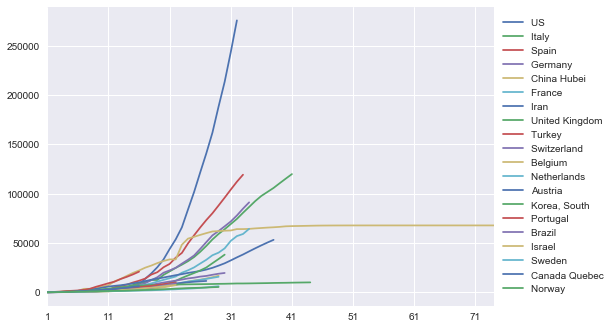

In [17]:
lineplot(df_growth_sorted, 20)

In [18]:
def derivative(df):
    '''
    INPUT:
    df - pandas dataframe with timeseries
    
    OUTPUT:
    df - pandas dataframe which represents a derivative of the input array
    
    Description:
    In the derivative for a timeseries, datapoint x is the differences of point x and x-1 from the input array.
    '''

    df_output=df.copy()
    
    # Sort according to the number of infections
    # Iterate over all rows in df and fill the user item data frame
    for index, row in df.iterrows():
    
        # Iterate over all columns
        increase=0
        last_col_name=0
        for col_name, col_data in df.iteritems():
            if col_name!='Infections':
                if last_col_name != 0:
                    df_output.at[index, col_name]=df.at[index, col_name]-df.at[index, last_col_name]
                    last_col_name=col_name
                else:
                    df_output.at[index, col_name]=0
                    last_col_name=col_name
        
    return df_output


In [19]:
df_derivative=derivative(df_growth_sorted)

In [20]:
del df_derivative['Infections']
df_derivative.head()

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
Country,,,,,,,,,,,,,,,,,,,,,
US,0.0,31.0,68.0,45.0,140.0,116.0,65.0,376.0,322.0,382.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Italy,0.0,74.0,93.0,131.0,202.0,233.0,240.0,566.0,342.0,466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,0.0,45.0,57.0,37.0,141.0,100.0,173.0,400.0,622.0,582.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,0.0,29.0,37.0,66.0,220.0,188.0,129.0,241.0,136.0,281.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China Hubei,0.0,0.0,105.0,212.0,297.0,365.0,2131.0,0.0,1349.0,903.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


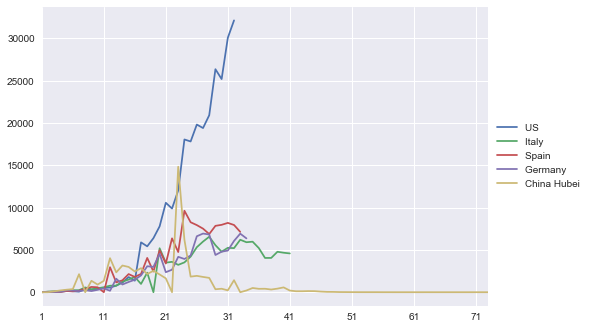

In [21]:
lineplot(df_derivative, 5)

In [22]:
df_2nd_derivative=derivative(df_derivative)

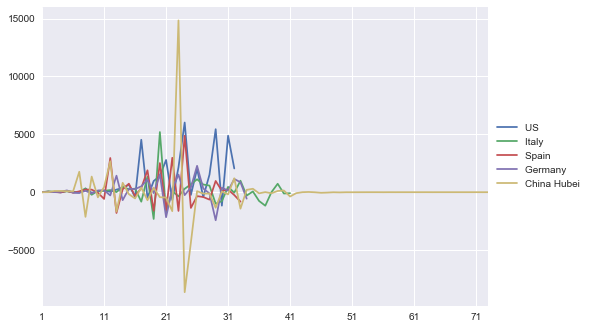

In [23]:
lineplot(df_2nd_derivative, 5)